<a href="https://colab.research.google.com/github/MinhDat13/Bai_tap_AI/blob/main/AI_W9_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


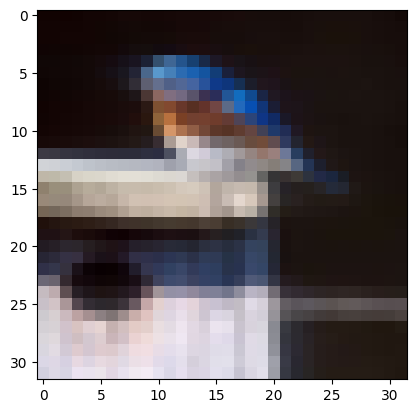

so:  [2]


In [ ]:
import matplotlib.pyplot as plt
digit = x_train[13]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('so: ', y_train[13])

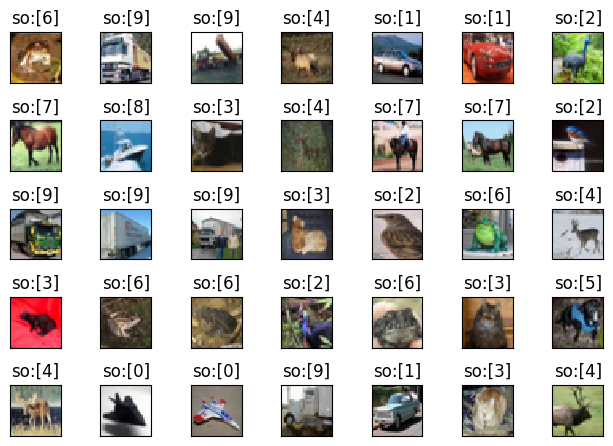

In [ ]:
for i in range(35):
  plt.subplot(5,7,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3000,activation='relu', input_shape=(32*32*3,)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_21 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_22 (Dense)            (None, 500)               500500    
                                                                 
 dense_23 (Dense)            (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = x_test
Y = y_test

In [ ]:
x_train = x_train.reshape(50000,32*32*3)   # chuyen thanh 1 hang
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)#doi kich thuoc thanh (10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')
model.fit(x_train,y_train, epochs = 10, batch_size  =128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('mat mat: ', test_loss)
print('do chinh xac: ', test_acc)

Epoch 1/10
391/391 [==============================] - 106s 268ms/step - loss: 2.2453 - accuracy: 0.2492
Epoch 2/10
391/391 [==============================] - 111s 283ms/step - loss: 1.8043 - accuracy: 0.3502
Epoch 3/10
391/391 [==============================] - 105s 269ms/step - loss: 1.7009 - accuracy: 0.3906
Epoch 4/10
391/391 [==============================] - 107s 274ms/step - loss: 1.6308 - accuracy: 0.4173
Epoch 5/10
391/391 [==============================] - 107s 274ms/step - loss: 1.5750 - accuracy: 0.4364
Epoch 6/10
391/391 [==============================] - 106s 272ms/step - loss: 1.5259 - accuracy: 0.4526
Epoch 7/10
391/391 [==============================] - 112s 286ms/step - loss: 1.4834 - accuracy: 0.4694
Epoch 8/10
391/391 [==============================] - 106s 272ms/step - loss: 1.4457 - accuracy: 0.4841
Epoch 9/10
391/391 [==============================] - 107s 273ms/step - loss: 1.4120 - accuracy: 0.4954
Epoch 10/10
313/313 [==============================] - 10s 30ms/

In [ ]:
model.save('test.h5')

1/1 [==============================] - 0s 109ms/step


array([2])

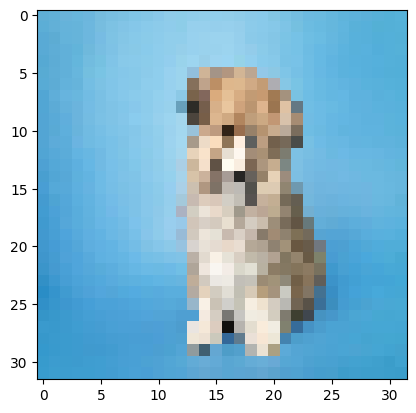

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('1.jpg',target_size =(32,32))#load file va resize anhr
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis = 1)